In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',100)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%load_ext rpy2.ipython

In [ ]:
df = pd.read_excel('trees.xlsx')
df

,Index,ID,yr,cm,annualprec,summerpdsi,wintertemp
0,1,290,1998,4.0,1.7650,-0.7950,5.633333
1,2,290,2002,4.4,1.8056,-1.0550,5.400000
2,3,290,2004,4.8,1.8532,-0.7950,5.100000
3,4,290,2006,5.1,1.4533,-2.0425,5.666667
4,5,290,2008,5.3,1.5392,-2.4700,4.833333
...,...,...,...,...,...,...,...
506,507,729,2006,26.4,1.4533,-2.0425,5.666667
507,508,729,2008,26.4,1.5392,-2.4700,4.833333
508,509,729,2010,26.5,1.4914,-1.5675,2.033333
509,510,729,2011,26.3,2.0694,-0.3875,5.133333


In [ ]:
df['ID'].nunique() # counting the number of unique values

88

In [ ]:
df['yr'].value_counts().sort_index() # counting the number of times each year appear and sorting accordingly

,count
yr,
1998,67
2002,68
2004,69
2006,64
2007,15
2008,77
2010,77
2011,74


In [ ]:
df.sort_values(by = ['yr','ID'])
df['cm_growth'] = df.groupby(['ID'])['cm'].pct_change()
df

,Index,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth
0,1,290,1998,4.0,1.7650,-0.7950,5.633333,NaN
1,2,290,2002,4.4,1.8056,-1.0550,5.400000,0.100000
2,3,290,2004,4.8,1.8532,-0.7950,5.100000,0.090909
3,4,290,2006,5.1,1.4533,-2.0425,5.666667,0.062500
4,5,290,2008,5.3,1.5392,-2.4700,4.833333,0.039216
...,...,...,...,...,...,...,...,...
506,507,729,2006,26.4,1.4533,-2.0425,5.666667,0.000000
507,508,729,2008,26.4,1.5392,-2.4700,4.833333,0.000000
508,509,729,2010,26.5,1.4914,-1.5675,2.033333,0.003788
509,510,729,2011,26.3,2.0694,-0.3875,5.133333,-0.007547


In [ ]:
# Checking the correlation between variables
df.corr()

,Index,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth
Index,1.000000,0.277952,0.015129,-0.195419,-0.010516,-0.012228,0.008701,0.022962
ID,0.277952,1.000000,0.165412,-0.159407,-0.071986,-0.096677,-0.062711,0.044468
yr,0.015129,0.165412,1.000000,-0.027707,-0.092939,-0.226462,-0.525235,-0.121801
cm,-0.195419,-0.159407,-0.027707,1.000000,0.070308,0.078491,-0.005269,-0.183631
annualprec,-0.010516,-0.071986,-0.092939,0.070308,1.000000,0.896033,0.314697,-0.017532
summerpdsi,-0.012228,-0.096677,-0.226462,0.078491,0.896033,1.000000,0.130760,0.029375
wintertemp,0.008701,-0.062711,-0.525235,-0.005269,0.314697,0.130760,1.000000,-0.054414
cm_growth,0.022962,0.044468,-0.121801,-0.183631,-0.017532,0.029375,-0.054414,1.000000


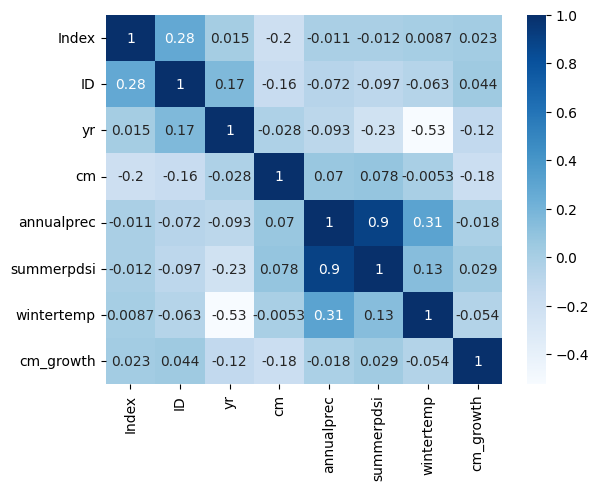

In [ ]:
# Since this correlation table is difficult to read, we read plot it using heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

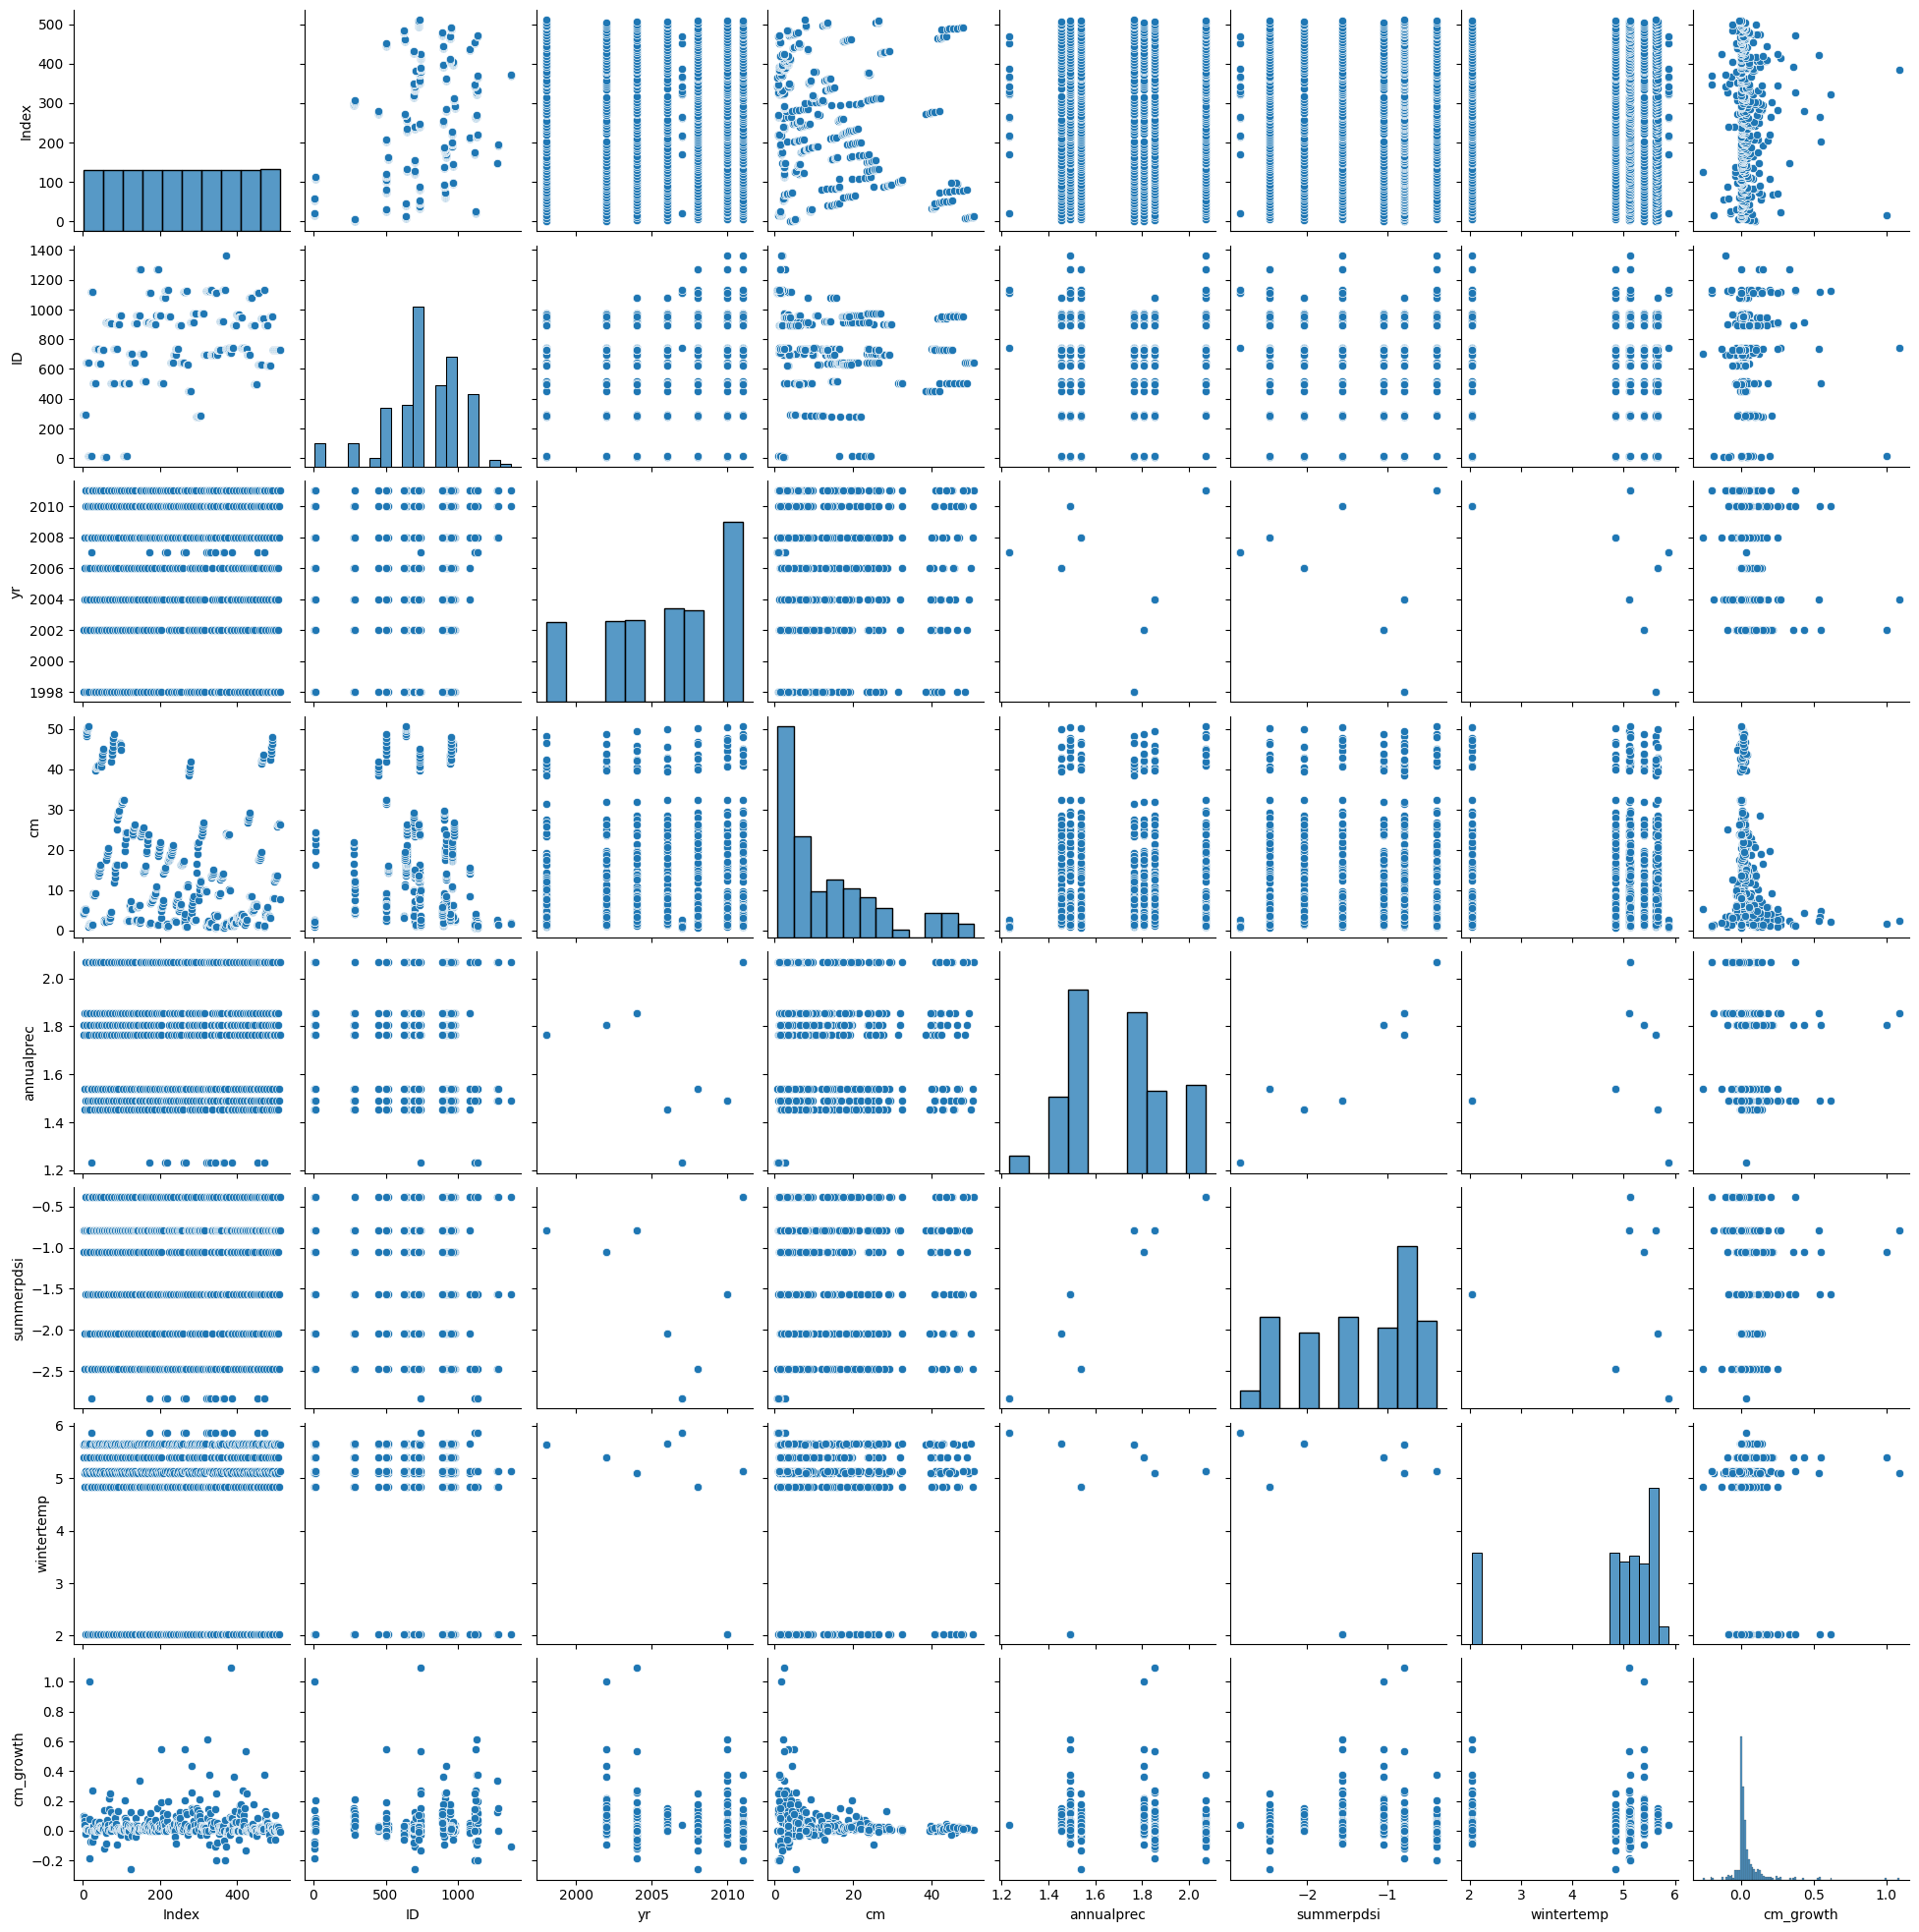

In [ ]:
sns.pairplot(df)
plt.show()

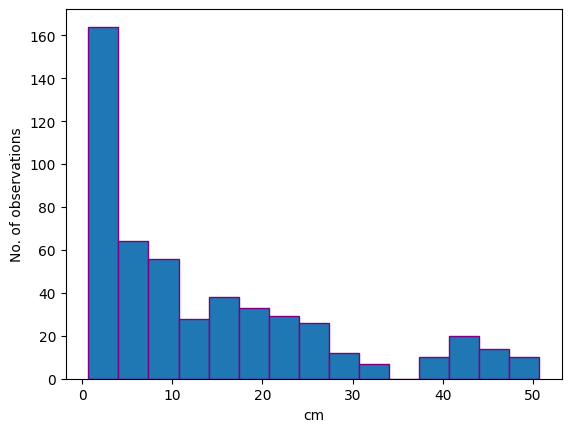

In [ ]:
plt.hist(x = df['cm'], lw = 2.5, edgecolor = 'purple', bins = 15)
plt.xlabel('cm')
plt.ylabel('No. of observations')
plt.show()

In [ ]:
# From here we figured it out that it is rightly skewed
print(df['cm'].mean())
print(df['cm'].median())
# since mean is > median

13.797455968688846
8.7


In [ ]:
conditions = [
    (df['cm'] <= 2.54),
    (df['cm'] > 2.54) & (df['cm'] <= 12.45),
    (df['cm'] > 12.45) & (df['cm'] <= 22.6),
    (df['cm'] > 22.6)
]
values = ['Seedlings', 'Saplings', 'Poletimbers', 'Sawtimbers']
df['Tree_size_category'] = np.select(conditions, values, default='Unknown')
df

,Index,ID,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,Tree_size_category
0,1,290,1998,4.0,1.7650,-0.7950,5.633333,NaN,Saplings
1,2,290,2002,4.4,1.8056,-1.0550,5.400000,0.100000,Saplings
2,3,290,2004,4.8,1.8532,-0.7950,5.100000,0.090909,Saplings
3,4,290,2006,5.1,1.4533,-2.0425,5.666667,0.062500,Saplings
4,5,290,2008,5.3,1.5392,-2.4700,4.833333,0.039216,Saplings
...,...,...,...,...,...,...,...,...,...
506,507,729,2006,26.4,1.4533,-2.0425,5.666667,0.000000,Sawtimbers
507,508,729,2008,26.4,1.5392,-2.4700,4.833333,0.000000,Sawtimbers
508,509,729,2010,26.5,1.4914,-1.5675,2.033333,0.003788,Sawtimbers
509,510,729,2011,26.3,2.0694,-0.3875,5.133333,-0.007547,Sawtimbers


In [ ]:
df['Tree_size_category'].unique()

array(['Saplings', 'Sawtimbers', 'Seedlings', 'Poletimbers'], dtype=object)

In [ ]:
px.scatter(df, x= 'summerpdsi', y='cm',color='Tree_size_category', trendline='ols')

In [ ]:
px.scatter(df, x= 'summerpdsi', y='cm_growth',color='Tree_size_category', trendline='ols')

In [ ]:
px.scatter(df, x= 'wintertemp', y='cm',color='Tree_size_category', trendline='ols')

In [ ]:
px.scatter(df, x= 'wintertemp', y='cm_growth',color='Tree_size_category', trendline='ols')

In [ ]:
df_tree_categories = df.groupby(['Tree_size_category','yr']).mean()
df_tree_categories

Index           ID         cm  annualprec  \
Tree_size_category yr                                                     
Poletimbers        1998  220.538462   670.846154  16.084615      1.7650   
                   2002  230.666667   678.800000  16.313333      1.8056   
                   2004  230.250000   703.812500  16.787500      1.8532   
                   2006  239.333333   749.800000  17.000000      1.4533   
                   2008  240.333333   749.800000  17.420000      1.5392   
                   2010  246.500000   738.071429  17.414286      1.4914   
                   2011  243.461538   773.538462  17.407692      2.0694   
Saplings           1998  293.296296   723.629630   6.770370      1.7650   
                   2002  281.846154   738.384615   6.315385      1.8056   
                   2004  289.629630   750.925926   6.359259      1.8532   
                   2006  290.826087   751.826087   6.408696      1.4533   
                   2007  387.000000   741.000000   2.600000      1.2303   
                   2008  287.086957   752.434783   6.343478      1.5392   
                   2010  287.083333   767.708333   6.441667      1.4914   
                   2011  282.520000   787.760000   6.372000      2.0694   
Sawtimbers         1998  222.125000   737.875000  34.081250      1.7650   
                   2002  223.125000   737.875000  34.531250      1.8056   
                   2004  224.125000   737.875000  35.000000      1.8532   
                   2006  225.875000   678.562500  33.943750      1.4533   
                   2008  226.875000   678.562500  34.362500      1.5392   
                   2010  217.388889   707.444444  34.833333      1.4914   
                   2011  218.388889   707.444444  35.116667      2.0694   
Seedlings          1998  230.363636   666.181818   1.963636      1.7650   
                   2002  257.818182   629.727273   1.936364      1.8056   
                   2004  243.300000   618.800000   2.070000      1.8532   
                   2006  244.300000   618.800000   2.120000      1.4533   
                   2007  294.500000  1124.000000   1.178571      1.2303   
                   2008  247.260870   951.347826   1.591304      1.5392   
                   2010  252.857143   956.761905   1.719048      1.4914   
                   2011  285.055556  1006.222222   1.633333      2.0694   

                         summerpdsi  wintertemp  cm_growth  
Tree_size_category yr                                       
Poletimbers        1998     -0.7950    5.633333        NaN  
                   2002     -1.0550    5.400000   0.052834  
                   2004     -0.7950    5.100000   0.036781  
                   2006     -2.0425    5.666667   0.031535  
                   2008     -2.4700    4.833333   0.024349  
                   2010     -1.5675    2.033333   0.019846  
                   2011     -0.3875    5.133333   0.020454  
Saplings           1998     -0.7950    5.633333        NaN  
                   2002     -1.0550    5.400000   0.082570  
                   2004     -0.7950    5.100000   0.059648  
                   2006     -2.0425    5.666667   0.035295  
                   2007     -2.8350    5.866667   0.040000  
                   2008     -2.4700    4.833333   0.038592  
                   2010     -1.5675    2.033333   0.059888  
                   2011     -0.3875    5.133333   0.019730  
Sawtimbers         1998     -0.7950    5.633333        NaN  
                   2002     -1.0550    5.400000   0.011146  
                   2004     -0.7950    5.100000   0.016187  
                   2006     -2.0425    5.666667   0.015569  
                   2008     -2.4700    4.833333   0.012784  
                   2010     -1.5675    2.033333   0.015459  
                   2011     -0.3875    5.133333   0.008349  
Seedlings          1998     -0.7950    5.633333        NaN  
                   2002     -1.0550    5.400000   0.202883  
                   2004     -0.7950    5.10

In [ ]:
df_tree_categories.drop(columns = ['Index','ID', 'cm_growth'], inplace = True)
df_tree_categories.reset_index(inplace = True)
df_tree_categories

,Tree_size_category,yr,cm,annualprec,summerpdsi,wintertemp
0,Poletimbers,1998,16.084615,1.7650,-0.7950,5.633333
1,Poletimbers,2002,16.313333,1.8056,-1.0550,5.400000
2,Poletimbers,2004,16.787500,1.8532,-0.7950,5.100000
3,Poletimbers,2006,17.000000,1.4533,-2.0425,5.666667
4,Poletimbers,2008,17.420000,1.5392,-2.4700,4.833333
5,Poletimbers,2010,17.414286,1.4914,-1.5675,2.033333
6,Poletimbers,2011,17.407692,2.0694,-0.3875,5.133333
7,Saplings,1998,6.770370,1.7650,-0.7950,5.633333
8,Saplings,2002,6.315385,1.8056,-1.0550,5.400000
9,Saplings,2004,6.359259,1.8532,-0.7950,5.100000


In [ ]:
#Growth rate annualized
df_tree_categories['cm_growth'] = df_tree_categories.groupby(['Tree_size_category'])['cm'].pct_change()
df_tree_categories

,Tree_size_category,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth
0,Poletimbers,1998,16.084615,1.7650,-0.7950,5.633333,NaN
1,Poletimbers,2002,16.313333,1.8056,-1.0550,5.400000,0.014220
2,Poletimbers,2004,16.787500,1.8532,-0.7950,5.100000,0.029066
3,Poletimbers,2006,17.000000,1.4533,-2.0425,5.666667,0.012658
4,Poletimbers,2008,17.420000,1.5392,-2.4700,4.833333,0.024706
5,Poletimbers,2010,17.414286,1.4914,-1.5675,2.033333,-0.000328
6,Poletimbers,2011,17.407692,2.0694,-0.3875,5.133333,-0.000379
7,Saplings,1998,6.770370,1.7650,-0.7950,5.633333,NaN
8,Saplings,2002,6.315385,1.8056,-1.0550,5.400000,-0.067202
9,Saplings,2004,6.359259,1.8532,-0.7950,5.100000,0.006947


In [ ]:
df_tree_categories['yr_difference'] = df.groupby(['Tree_size_category'])['yr'].diff()
df_tree_categories

,Tree_size_category,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,yr_difference
0,Poletimbers,1998,16.084615,1.7650,-0.7950,5.633333,NaN,NaN
1,Poletimbers,2002,16.313333,1.8056,-1.0550,5.400000,0.014220,4.0
2,Poletimbers,2004,16.787500,1.8532,-0.7950,5.100000,0.029066,2.0
3,Poletimbers,2006,17.000000,1.4533,-2.0425,5.666667,0.012658,2.0
4,Poletimbers,2008,17.420000,1.5392,-2.4700,4.833333,0.024706,2.0
5,Poletimbers,2010,17.414286,1.4914,-1.5675,2.033333,-0.000328,2.0
6,Poletimbers,2011,17.407692,2.0694,-0.3875,5.133333,-0.000379,1.0
7,Saplings,1998,6.770370,1.7650,-0.7950,5.633333,NaN,NaN
8,Saplings,2002,6.315385,1.8056,-1.0550,5.400000,-0.067202,4.0
9,Saplings,2004,6.359259,1.8532,-0.7950,5.100000,0.006947,2.0


In [ ]:
df_tree_categories['cm_growth'] = df_tree_categories['cm_growth'] / df_tree_categories['yr_difference']
df_tree_categories

,Tree_size_category,yr,cm,annualprec,summerpdsi,wintertemp,cm_growth,yr_difference
0,Poletimbers,1998,16.084615,1.7650,-0.7950,5.633333,NaN,NaN
1,Poletimbers,2002,16.313333,1.8056,-1.0550,5.400000,0.003555,4.0
2,Poletimbers,2004,16.787500,1.8532,-0.7950,5.100000,0.014533,2.0
3,Poletimbers,2006,17.000000,1.4533,-2.0425,5.666667,0.006329,2.0
4,Poletimbers,2008,17.420000,1.5392,-2.4700,4.833333,0.012353,2.0
5,Poletimbers,2010,17.414286,1.4914,-1.5675,2.033333,-0.000164,2.0
6,Poletimbers,2011,17.407692,2.0694,-0.3875,5.133333,-0.000379,1.0
7,Saplings,1998,6.770370,1.7650,-0.7950,5.633333,NaN,NaN
8,Saplings,2002,6.315385,1.8056,-1.0550,5.400000,-0.016801,4.0
9,Saplings,2004,6.359259,1.8532,-0.7950,5.100000,0.003474,2.0


In [ ]:
fig1 = px.scatter(df_tree_categories, x= 'summerpdsi', y='cm',color='Tree_size_category', trendline='ols')
fig1

In [ ]:
result = px.get_trendline_results(fig1)
print(result)

  Tree_size_category                                     px_fit_results
0        Poletimbers  <statsmodels.regression.linear_model.Regressio...
1           Saplings  <statsmodels.regression.linear_model.Regressio...
2         Sawtimbers  <statsmodels.regression.linear_model.Regressio...
3          Seedlings  <statsmodels.regression.linear_model.Regressio...


In [ ]:
result.query("Tree_size_category == 'Seedlings'").px_fit_results.iloc[0].summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.512
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.164
Time:                        08:36:10   Log-Likelihood:              -0.094321
No. Observations:                   8   AIC:                             4.189
Df Residuals:                       6   BIC:                             4.348
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0631      0.207      9.985      0.000       1.558       2.569
x1             0.1919      0.121      1.585      0.164      -0.104       0.488
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.109
Skew:                           0.090   Prob(JB):                        0.947
Kurtosis:                       2.458   Cond. No.                         4.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_cm = df_tree_categories.drop(columns=['cm_growth','yr_difference'])
df_cm_growth = df_tree_categories.drop(columns=['cm','yr_difference'])
df_cm_growth.dropna(inplace=True)
df_cm

,Tree_size_category,yr,cm,annualprec,summerpdsi,wintertemp
0,Poletimbers,1998,16.084615,1.7650,-0.7950,5.633333
1,Poletimbers,2002,16.313333,1.8056,-1.0550,5.400000
2,Poletimbers,2004,16.787500,1.8532,-0.7950,5.100000
3,Poletimbers,2006,17.000000,1.4533,-2.0425,5.666667
4,Poletimbers,2008,17.420000,1.5392,-2.4700,4.833333
5,Poletimbers,2010,17.414286,1.4914,-1.5675,2.033333
6,Poletimbers,2011,17.407692,2.0694,-0.3875,5.133333
7,Saplings,1998,6.770370,1.7650,-0.7950,5.633333
8,Saplings,2002,6.315385,1.8056,-1.0550,5.400000
9,Saplings,2004,6.359259,1.8532,-0.7950,5.100000


In [ ]:
df_cm.to_csv('df_cm.csv', index=False)
df_cm_growth.to_csv('df_cm_growth.csv',index=False)